In [204]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [205]:
import warnings
warnings.filterwarnings('ignore')

In [206]:
df_stock = fdr.StockListing('KRX') #NYSE
df_stock.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,86000,1,2100,2.50,84900,86200,84700,22039361,1886160393690,509088861292000,5919637922,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,360000,1,12500,3.60,351000,362000,351000,2802437,1001954505000,262080851400000,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,347500,3,0,0.00,349000,351000,341000,141477,48966620250,81315000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,1005000,1,8000,0.80,999000,1012000,999000,64286,64638117000,71529870000000,71174000,STK
4,012450,KR7012450003,한화에어로스페이스,KOSPI,,1099000,2,-8000,-0.72,1100000,1113000,1081000,158652,173734761500,56668177699000,51563401,STK


In [207]:
filt = df_stock['Name'].str.contains('삼성전자')
df_stock[filt]

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,86000,1,2100,2.50,84900,86200,84700,22039361,1886160393690,509088861292000,5919637922,STK
5,005935,KR7005931001,삼성전자우,KOSPI,,68000,1,1600,2.41,67000,68000,66800,2516808,170209122050,55486277152000,815974664,STK


In [208]:
code = '005930'
df = fdr.DataReader(code, '2024-01-01')
df.shape

(428, 6)

In [209]:
df.index[0]

Timestamp('2024-01-02 00:00:00')

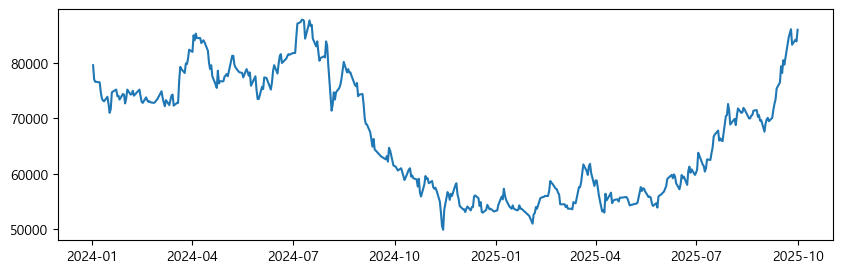

In [210]:
plt.figure(figsize=(10, 3))
plt.plot(df.index, df['Close'])
plt.show()

In [211]:
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2024-01-02,78200,79800,78200,79600,17142847,0.014013
2024-01-03,78500,78800,77000,77000,21753644,-0.032663
2024-01-04,76100,77300,76100,76600,15324439,-0.005195
2024-01-05,76700,77100,76400,76600,11304316,0.000000
2024-01-08,77000,77500,76400,76500,11088724,-0.001305


In [212]:
df['년'] = df.index.year
df['월'] = df.index.month
df['일'] = df.index.day
df

,Open,High,Low,Close,Volume,Change,년,월,일
Date,,,,,,,,,
2024-01-02,78200,79800,78200,79600,17142847,0.014013,2024,1,2
2024-01-03,78500,78800,77000,77000,21753644,-0.032663,2024,1,3
2024-01-04,76100,77300,76100,76600,15324439,-0.005195,2024,1,4
2024-01-05,76700,77100,76400,76600,11304316,0.000000,2024,1,5
2024-01-08,77000,77500,76400,76500,11088724,-0.001305,2024,1,8
...,...,...,...,...,...,...,...,...,...
2025-09-25,84400,86200,84100,86100,19665151,0.008197,2025,9,25
2025-09-26,85000,85300,82400,83300,24071193,-0.032520,2025,9,26
2025-09-29,83300,85000,83200,84200,13069094,0.010804,2025,9,29


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 428 entries, 2024-01-02 to 2025-10-01
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    428 non-null    int64  
 1   High    428 non-null    int64  
 2   Low     428 non-null    int64  
 3   Close   428 non-null    int64  
 4   Volume  428 non-null    int64  
 5   Change  428 non-null    float64
 6   년       428 non-null    int32  
 7   월       428 non-null    int32  
 8   일       428 non-null    int32  
dtypes: float64(1), int32(3), int64(5)
memory usage: 28.4 KB


In [214]:
df = df[df['년']==2024]
df.tail()

,Open,High,Low,Close,Volume,Change,년,월,일
Date,,,,,,,,,
2024-12-23,53400,54000,53300,53500,13672650,0.009434,2024,12,23
2024-12-24,53700,54500,53600,54400,11634677,0.016822,2024,12,24
2024-12-26,54500,54600,53500,53600,10517075,-0.014706,2024,12,26
2024-12-27,53500,54100,53200,53700,10747196,0.001866,2024,12,27
2024-12-30,53300,54000,53100,53200,12624702,-0.009311,2024,12,30


In [215]:
group = df.groupby('월')[['Close', 'Volume']].mean()
group['Vol'] = group['Volume']/1000
group

,Close,Volume,Vol
월,,,
1,74454.545455,1.807449e+07,18074.489045
2,73684.210526,1.573450e+07,15734.499158
3,75760.000000,2.241809e+07,22418.086800
4,80595.238095,2.306391e+07,23063.906095
5,77780.000000,2.105444e+07,21054.439100
6,78831.578947,1.852085e+07,18520.854368
7,84382.608696,2.074605e+07,20746.049957
8,76500.000000,1.914334e+07,19143.341714
9,66033.333333,2.870442e+07,28704.417722


In [216]:
df = group.copy()

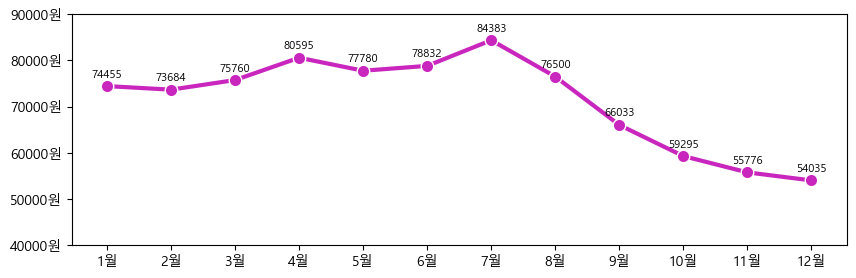

In [217]:
import numpy as np
plt.figure(figsize=(10, 3))
plt.plot(df.index, df['Close'], marker='o', color="#C926BE", lw=3, mec='w', ms=9)
xticks = [x for x in df.index]
plt.xticks(xticks, [f'{x}월' for x in xticks])
ymin = int((df['Close'].min()-5000)/10000)*10000
ymax = int(df['Close'].max()+10000)
yticks = [y for y in range(ymin, ymax, 10000)]
plt.yticks(yticks, [f'{y}원' for y in yticks])
for idx, close in enumerate(df['Close']):
    plt.text(df.index[idx], close+2000, f'{close:.0f}', ha='center', size=8)
plt.show()

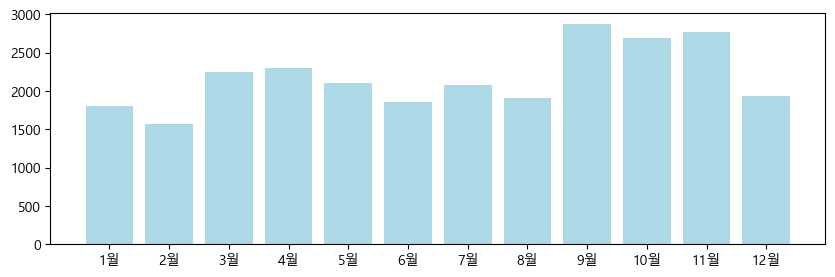

In [218]:
plt.figure(figsize=(10, 3))
plt.bar(df.index, df['Volume']/10000, color='lightblue')
xticks = [x for x in df.index]
plt.xticks(xticks, [f'{x}월' for x in xticks])
ymax = int(df['Volume'].max()/10000)

plt.show()

In [219]:
#시계열 ARIMA

In [220]:
code = '005930'
ss = fdr.DataReader(code, '2020-01-01', '2021-08-30')
ss.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-08-24,73900,75700,73900,75600,21016913,0.031378
2021-08-25,76200,76600,74900,75700,22319664,0.001323
2021-08-26,76100,76200,74600,74600,16671494,-0.014531
2021-08-27,74300,75000,73800,74300,15172748,-0.004021
2021-08-30,75400,75500,74200,74600,12686999,0.004038


In [221]:
n_train = int(len(ss) * 0.7)

len(ss), n_train

(413, 289)

In [222]:
y_train = ss['Close'][:n_train]
y_test = ss['Close'][n_train:]

In [223]:
len(y_train), len(y_test)

(289, 124)

In [224]:
y_train[:5], y_test[:5]

(Date
 2020-01-02    55200
 2020-01-03    55500
 2020-01-06    55500
 2020-01-07    55800
 2020-01-08    56800
 Name: Close, dtype: int64,
 Date
 2021-03-05    82100
 2021-03-08    82000
 2021-03-09    81400
 2021-03-10    80900
 2021-03-11    82000
 Name: Close, dtype: int64)

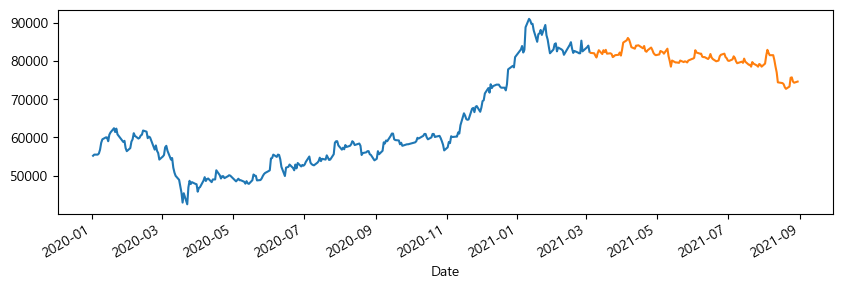

In [225]:
plt.figure(figsize=(10, 3))
y_train.plot()
y_test.plot()
plt.show()

In [226]:
from pmdarima.arima import ndiffs
ndif = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
ndif

1

In [227]:
import pmdarima as pm
model = pm.auto_arima(
    y_train, d=1, start_p=0, max_p=3, start_q=0, max_q=3, m=1, seasonal=False, trace=True
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4934.821, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4936.780, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4936.799, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4934.428, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4938.798, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.090 seconds


In [228]:
model.fit(y_train)

,order,"(0, ...)"
,seasonal_order,"(0, ...)"
,start_params,None
,method,'lbfgs'
,maxiter,50
,suppress_warnings,True
,out_of_sample_size,0
,scoring,'mse'
,scoring_args,{}
,trend,None
,with_intercept,False


In [229]:
y_pred = model.predict(n_periods=len(y_test))
y_pred

289    82400.0
290    82400.0
291    82400.0
292    82400.0
293    82400.0
        ...   
408    82400.0
409    82400.0
410    82400.0
411    82400.0
412    82400.0
Length: 124, dtype: float64

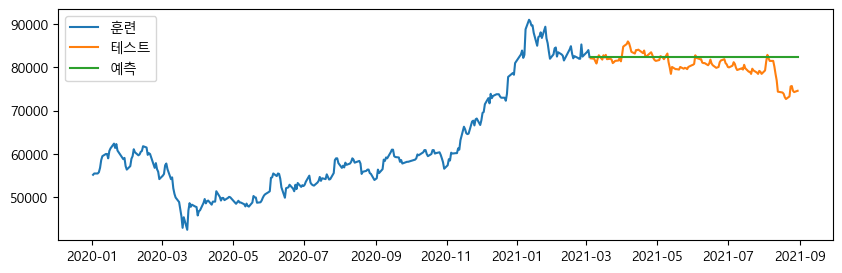

In [230]:
plt.figure(figsize=(10, 3))
plt.plot(y_train, label='훈련')
plt.plot(y_test, label='테스트')
plt.plot(y_test.index, y_pred, label='예측')
plt.legend()
plt.show()

In [231]:
def one_step():
    pred, conf_int = model.predict(n_periods=1, return_conf_int=True)
    #print('예측:', pred.tolist()[0])
    #print('예측 하한, 상한:', conf_int[0])
    return pred.tolist()[0], conf_int[0]

In [232]:
one_step()

(82400.0, array([79921.28905069, 84878.71094931]))

In [233]:
y_pred = []
y_lower = []
y_upper = []
for i in range(len(y_test)):
    pred, conf = one_step()
    y_pred.append(pred)
    y_lower.append(conf[0])
    y_upper.append(conf[1])
    model.update(y_test[i])

In [234]:
len(y_pred), len(y_upper), len(y_lower)
y_pred[0], y_upper[0], y_lower[0]

(82400.0, 84878.71094930936, 79921.28905069064)

In [235]:
y_pred

[82400.0,
 82100.0,
 82000.0,
 81400.0,
 80900.0,
 82000.0,
 82800.0,
 81800.0,
 82800.0,
 82300.0,
 82900.0,
 81900.0,
 82000.0,
 81800.0,
 81000.0,
 81200.0,
 81500.0,
 81600.0,
 82200.0,
 81400.0,
 82900.0,
 84800.0,
 85400.0,
 86000.0,
 85600.0,
 84700.0,
 83600.0,
 83200.0,
 84000.0,
 84000.0,
 84100.0,
 83900.0,
 83300.0,
 83900.0,
 82600.0,
 82400.0,
 82800.0,
 83500.0,
 82900.0,
 82100.0,
 81700.0,
 81500.0,
 81700.0,
 82600.0,
 82300.0,
 81900.0,
 83200.0,
 81200.0,
 80000.0,
 78500.0,
 80100.0,
 79600.0,
 79600.0,
 79500.0,
 80100.0,
 79700.0,
 79900.0,
 79800.0,
 79600.0,
 80100.0,
 80500.0,
 80600.0,
 80800.0,
 82800.0,
 82200.0,
 81900.0,
 81900.0,
 81100.0,
 81000.0,
 81000.0,
 80500.0,
 80900.0,
 81800.0,
 80900.0,
 80500.0,
 79900.0,
 80000.0,
 80100.0,
 81200.0,
 81600.0,
 81900.0,
 81000.0,
 80700.0,
 80100.0,
 80000.0,
 80400.0,
 81200.0,
 80800.0,
 79900.0,
 79400.0,
 79700.0,
 79800.0,
 79500.0,
 80600.0,
 79800.0,
 79000.0,
 79000.0,
 78500.0,
 79700.0,
 79300.0,


In [236]:
import pandas as pd
pred = pd.Series(y_pred, index=y_test.index)
lower = pd.Series(y_lower, index=y_test.index)
upper = pd.Series(y_upper, index=y_test.index)

In [237]:
data = {'예측':y_pred, '하한':y_lower, '상한':y_upper}

In [238]:
df = pd.DataFrame(data, index=y_test.index)
df['실제'] = y_test
df

,예측,하한,상한,실제
Date,,,,
2021-03-05,82400.0,79921.289051,84878.710949,82100
2021-03-08,82100.0,79621.289051,84578.710949,82000
2021-03-09,82000.0,79521.289051,84478.710949,81400
2021-03-10,81400.0,78921.289051,83878.710949,80900
2021-03-11,80900.0,78421.289051,83378.710949,82000
...,...,...,...,...
2021-08-24,73300.0,71040.218891,75559.781109,75600
2021-08-25,75600.0,73340.218891,77859.781109,75700
2021-08-26,75700.0,73440.218891,77959.781109,74600


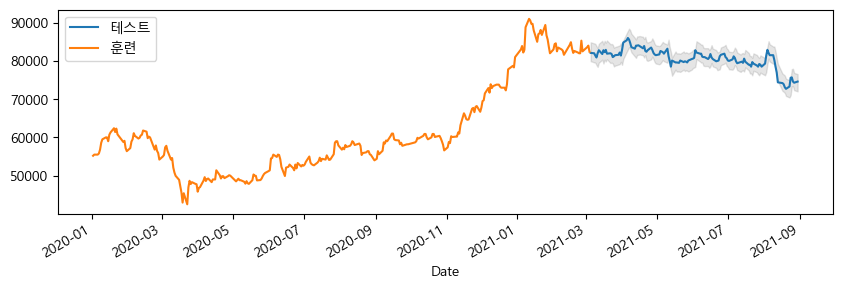

In [239]:
plt.figure(figsize=(10, 3))
plt.plot(y_test, label='테스트')
y_train.plot(label='훈련')
plt.fill_between(lower.index, lower, upper, color='k', alpha=0.1)
plt.legend()
plt.show()

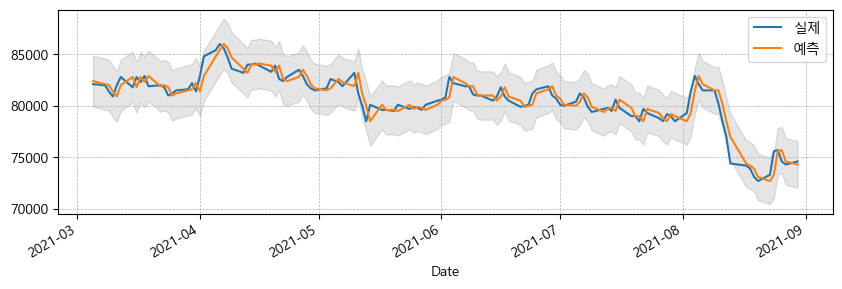

In [240]:
plt.figure(figsize=(10, 3))
plt.plot(y_test, label='실제')
pred.plot(label='예측')
plt.fill_between(lower.index, lower, upper, color='k', alpha=0.1)
plt.grid(True, ls='--', lw=0.5)
plt.legend()
plt.show()

In [241]:
#티커 종목코드 구하기
import FinanceDataReader as fdr
df = fdr.StockListing('KRX')
names = ['삼성전자', '카카오', 'NAVER', 'LG전자', '현대차']
filt = df['Name'].isin(names)
df = df[filt][['Code', 'Name']]
names = list(df['Name'])
codes = list(df['Code'])
names, codes

(['삼성전자', '현대차', 'NAVER', '카카오', 'LG전자'],
 ['005930', '005380', '035420', '035720', '066570'])

In [242]:
#1. 삼성전자의 start~end까지 주식데이터
code = '005930'
start = '2025-01-01'
end = '2025-09-30'
df = fdr.DataReader(code, start, end)

y_train=df['Close']

In [243]:
#2.모델 생성 학습
import pmdarima as pm
model = pm.auto_arima(
    y_train, d=1, start_p=0, max_p=3, start_q=0, max_q=3, m=1, seasonal=False
)
model.fit(y_train)

,order,"(0, ...)"
,seasonal_order,"(0, ...)"
,start_params,None
,method,'lbfgs'
,maxiter,50
,suppress_warnings,True
,out_of_sample_size,0
,scoring,'mse'
,scoring_args,{}
,trend,None
,with_intercept,True


In [ ]:
#4. 예측실행
pred = []
lower = []
upper = []
for y in y_train:
    y_pred, conf = model.predict(n_periods=1, return_conf_int=True)
    pred.append(y_pred.tolist()[0])
    lower.append(conf[0][0])
    upper.append(conf[0][1])
    model.update(y)

In [246]:
pred[:5], upper[:5], lower[:5], y_train[:5]

([84067.58241758242,
  53465.14213202203,
  54418.10981076385,
  55918.10981076385,
  55418.10981076385],
 [86417.0194043793,
  57980.174708960876,
  59400.596736268686,
  60900.596736268686,
  60400.596736268686],
 [81718.14543078555,
  48950.10955508319,
  49435.62288525902,
  50935.62288525902,
  50435.62288525902],
 Date
 2025-01-02    53400
 2025-01-03    54400
 2025-01-06    55900
 2025-01-07    55400
 2025-01-08    57300
 Name: Close, dtype: int64)

In [247]:
#5. 결과를 데이터프레임으로 변환
df = pd.DataFrame(y_train)
df['예측'] = pred
df['하한'] = lower
df['상한'] = upper
df

,Close,예측,하한,상한
Date,,,,
2025-01-02,53400,84067.582418,81718.145431,86417.019404
2025-01-03,54400,53465.142132,48950.109555,57980.174709
2025-01-06,55900,54418.109811,49435.622885,59400.596736
2025-01-07,55400,55918.109811,50935.622885,60900.596736
2025-01-08,57300,55418.109811,50435.622885,60400.596736
...,...,...,...,...
2025-09-24,85400,84749.317063,80789.092395,88709.541732
2025-09-25,86100,85449.317063,81489.092395,89409.541732
2025-09-26,83300,86153.126803,82199.248873,90107.004734


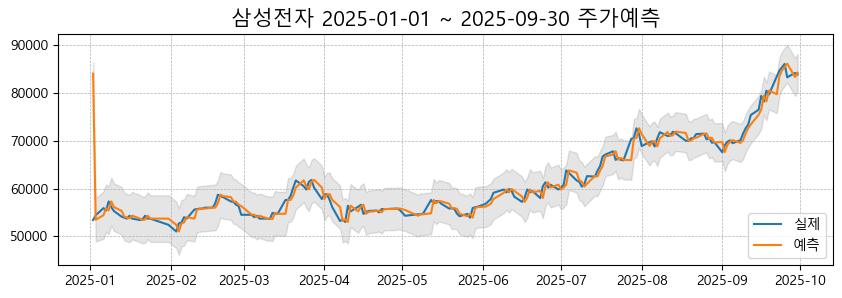

In [250]:
#6. 그래프출력
plt.figure(figsize=(10, 3))
plt.plot(df['Close'], label='실제')
plt.plot(df['예측'], label='예측')

plt.fill_between(df.index, df['하한'], df['상한'], color='k', alpha=0.1)
plt.grid(True, ls='--', lw=0.5)
plt.legend()
plt.title(f'삼성전자 {start} ~ {end} 주가예측' , size=15)
plt.show()

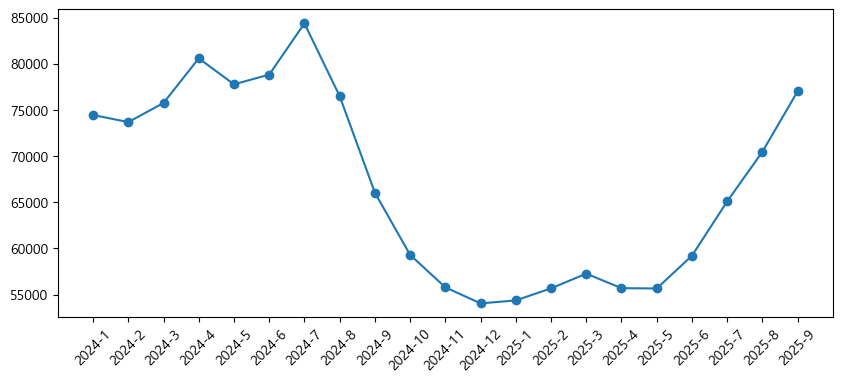

In [264]:
code='005930'
start='2024-01-01'
end='2025-09-30'
df=fdr.DataReader(code, start, end)
df['year'] = df.index.year
df['month'] = df.index.month
group = df.groupby(['year', 'month'])[['Close', 'Volume']].mean()
group.reset_index(inplace=True)

plt.figure(figsize=(10, 4))
plt.plot(group.index, group['Close'], marker='o')
xticks=[x for x in group.index]
plt.xticks(xticks, [f"{group.loc[idx, 'year']}-{group.loc[idx, 'month']}" for idx in xticks], rotation=45)
plt.show()

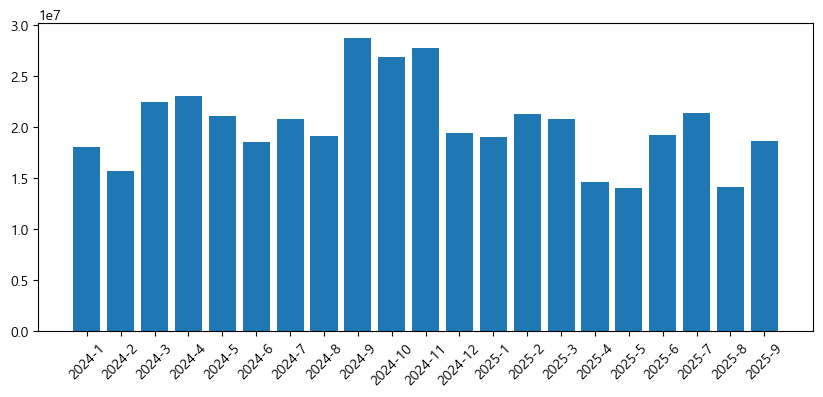

In [265]:
plt.figure(figsize=(10, 4))
plt.bar(group.index, group['Volume'])
xticks=[x for x in group.index]
plt.xticks(xticks, [f"{group.loc[idx, 'year']}-{group.loc[idx, 'month']}" for idx in xticks], rotation=45)
plt.show()